In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Quedtion 01
#Intensity Transformation
# Import Emma image
emma = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

Lookup Table Shape: (256,)


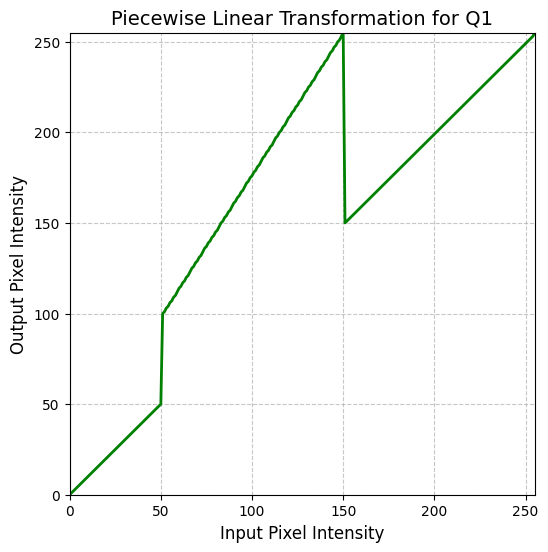

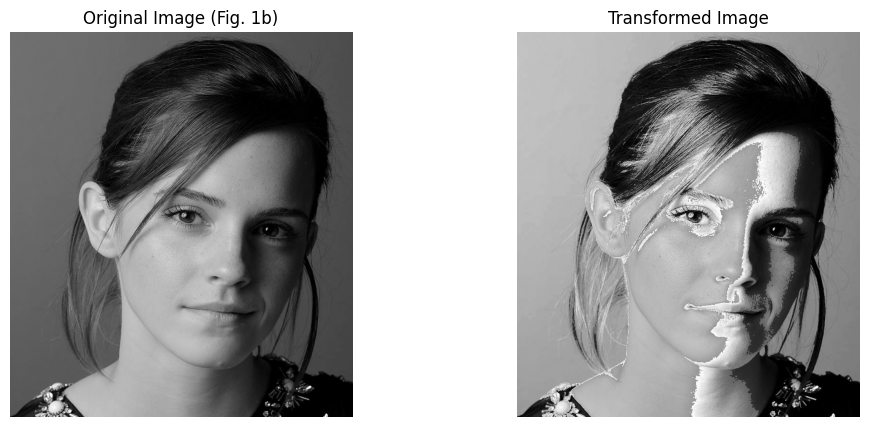

In [22]:
# Create a piecewise linear transformation for intensity mapping
# Segment 1: Maps 0-50 to 0-50 (no change for low intensities)
# Segment 2: Maps 51-150 to 100-255 (stretches mid-range intensities)
# Segment 3: Maps 151-255 to 150-255 (compresses high intensities)
segment_low = np.linspace(0, 50, num=51).astype(np.uint8)  # First 51 intensities
segment_mid = np.linspace(100, 255, num=100).astype(np.uint8)  # Next 100 intensities
segment_high = np.linspace(150, 255, num=105).astype(np.uint8)  # Last 105 intensities

# Combine segments into a 256-element LUT
intensity_lut = np.concatenate((segment_low, segment_mid, segment_high), axis=0).astype(np.uint8)

# Verify the LUT has 256 values for all input intensities (0-255)
print(f"Lookup Table Shape: {intensity_lut.shape}")

# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(intensity_lut, color='green', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Piecewise Linear Transformation for Q1", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q1_transform_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Apply the piecewise transformation using the LUT
transformed_image = cv.LUT(emma, intensity_lut)

# Visualize original and transformed images side by side
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.title("Original Image (Fig. 1b)", fontsize=12)
plt.axis('off')
plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image", fontsize=12)
plt.axis('off')
plt.savefig('q1_image_comparison.png', dpi=300, bbox_inches='tight')
plt.show()